<a href="https://colab.research.google.com/github/dubeyabhi07/hands-on-scikit-learn/blob/master/metrics/binaryClassificationMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# read in the iris data
cancer = load_breast_cancer()

# create X (features) and y (response)
X = cancer.data
y = cancer.target

# Classification accuracy
- Useful when data is balanced.
- For an unbalanced data-set (say 90% belong to class-1), even null accuracy is 90%.

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# calculate accuracy
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9468085106382979


# Confusion Matrix
- Useful for all kind of dataset (balanced/unbalanced)  

### Basic terminology

- True Positives (mat[1][1]): we correctly predicted that they do have cancer.
- True Negatives (mat[0][0]): we correctly predicted that they don't have cancer.
- False Positives (mat[0][1]): we incorrectly predicted that they do have cancer (a "Type I error") 
- False Negatives (mat[1][0]): we incorrectly predicted that they don't have cancer (a "Type II error").

[[ 63   4]
 [  6 115]]


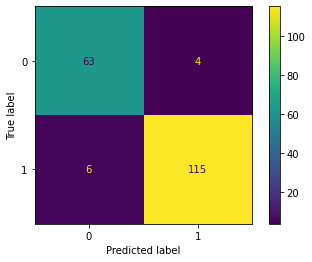

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix
x =plot_confusion_matrix(knn, X_test, y_test,values_format = 'd')  # doctest: +SKIP
plt.show()

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Sensitivity Or Recall: 

- When the actual value is positive, how often is the prediction correct?
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate".

In [ ]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.9504132231404959
0.9504132231404959


# Specificity and False-positive-rate: 

- Specificity is : when the actual value is negative, how often is the prediction correct?
- How "specific" (or "selective") is the classifier in predicting positive instances?

- False-positive-rate is (1-specificity)

In [ ]:
print("Specificity : %0.2f" % (TN / float(TN + FP)))
print("false-positive-rate: %0.2f" %(FP / float(TN + FP)))

Specificity : 0.94
false-positive-rate: 0.06


# Precision: 
- When a positive value is predicted, how often is the prediction correct?
- How "precise" is the classifier when predicting positive instances?

In [ ]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.9663865546218487
0.9663865546218487


# Takeaways

- Choice of metric depends on your business objective
- Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

# All Useful Metrics:
- Covered already:
  - **accuracy_score()**
  - **recall_score()**
  - **precision_score()**
- Others: 
  - **fbeta_score()** : (1+b^2)((precison)x(recall))/(b^2)x(precison) + recall). When b is 0, it becomes precison and b is inf, it becomes recall. When FP can to be tolerated but not FN (cancer detection case), recall should be given more weightage and hence b>1.  
  - **f1_score()** : when b=1, both precision and recall are equaly important.
  - **precision_recall_fscore_support()** : Compute precision, recall, F-measure and support for each class.
  - **balanced_accuracy_score** : average recall of each class.
  - **classification_report** : self-explainatory.

- Explained later :
  - **roc_auc_score**
  - **average_precision_score**


In [ ]:
print("output of fbeta_score : ")
print(metrics.fbeta_score(y_test, y_pred, beta=0))
print(metrics.fbeta_score(y_test, y_pred, beta=0.5))
print(metrics.f1_score(y_test, y_pred))
print(metrics.fbeta_score(y_test, y_pred, beta=2.0))

print("\noutput of precison_recall_fscore_support : ")
print(metrics.precision_recall_fscore_support(y_test,y_pred,beta=1))
print(metrics.precision_recall_fscore_support(y_test,y_pred,beta=2))


print("\noutput of balanced_accuracy_score : ")
print(metrics.balanced_accuracy_score(y_test,y_pred))

print("\noutput of classification_report: ")
print(metrics.classification_report(y_test,y_pred))




output of fbeta_score : 
0.9663865546218487
0.9631490787269682
0.9583333333333334
0.9535655058043118

output of precison_recall_fscore_support : 
(array([0.91304348, 0.96638655]), array([0.94029851, 0.95041322]), array([0.92647059, 0.95833333]), array([ 67, 121]))
(array([0.91304348, 0.96638655]), array([0.94029851, 0.95041322]), array([0.9347181 , 0.95356551]), array([ 67, 121]))

output of balanced_accuracy_score : 
0.9453558653015912

output of classification_report: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.97      0.95      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.94       188
weighted avg       0.95      0.95      0.95       188



# ROC Curves and Area Under the Curve (AUC)

- Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be adjusted to increase sensitivity or specificity.Sensitivity and specificity have an inverse relationship. Greater threshold makes the model more specific. 
- ROC is the curve between FPR and TPR for varying threshholds.
- AUC is area under that curve. Greater the area, better the model.

In [ ]:
knn.predict_proba(X_test)[0:5, :]

array([[0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ]])

Text(0, 0.5, 'Frequency')

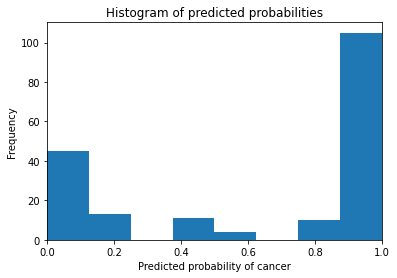

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of cancer')
plt.ylabel('Frequency')

In [ ]:
# predict cancer if the predicted probability is greater than 0.6 else not. Increasing specificity of model
# observation made after looking at model. (not recommended as for such detections model sensitivity should be high)
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.6)[0]
print(y_pred_prob[0:5])
print(y_pred_class[0:5])
print(metrics.confusion_matrix(y_test, y_pred_class))

[0.4 1.  1.  0.4 1. ]
[0. 1. 1. 0. 1.]
[[ 63   4]
 [ 10 111]]


[0.         0.04477612 0.05970149 0.05970149 0.1641791  0.32835821
 1.        ]
[0.         0.84297521 0.91735537 0.95041322 0.98347107 1.
 1.        ]
[2.  1.  0.8 0.6 0.4 0.2 0. ]


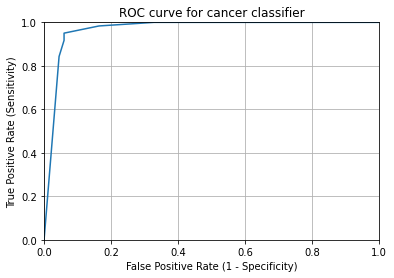

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)



print(fpr)
print(tpr)
print(thresholds)

- when threshhold is < 0, everything is predicted positive, no FN and no TN results in tpr = fpr = 1
- when threshhold is > 0, evrything is predicted negavite, no TP and no FP, results in tpr = fpr = 0

- Number of threshholds returned by roc_curve function is governed by number of different values in y_pred_prob. if y_pred would have been passed, it would have returned only 3 threshholds.

- Ideally, we want the fraction of correct positive class predictions to be 1 (top of the plot) and the fraction of incorrect negative class predictions to be 0 (left of the plot). This highlights that the best possible classifier that achieves perfect skill is the top-left of the plot.

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))


0.9674972246206981


- For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score.
- To compare 2 models, directly compare AUC

# Precision-Recall Curve
- computes precision(y) vs recall(x) for varying threshhold.
- A model with perfect skill is depicted as a point at a coordinate of (1,1). A skillful model is represented by a curve that bows towards a coordinate of (1,1).
- Precision-recall curves (PR curves) are recommended for highly skewed domains where ROC curves may provide an excessively optimistic view of the performance.
- The focus of the PR curve on the minority class makes it an effective diagnostic for imbalanced binary classification models. example : testing a pandemic only 5-10% people will be affected. Both the precision and the recall are focused on the positive class (the minority class) and are unconcerned with the true negatives (majority class).

[0.84615385 0.91538462 0.96638655 0.96521739 0.97142857 1.        ]
[1.         0.98347107 0.95041322 0.91735537 0.84297521 0.        ]
[0.2 0.4 0.6 0.8 1. ]


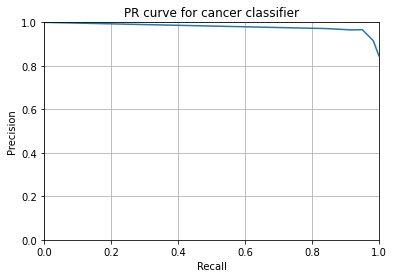

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob)
print(precision)
print(recall)
print(thresholds)

plt.plot(recall,precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('PR curve for cancer classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

In [ ]:
print(metrics.average_precision_score(y_test, y_pred_prob))

0.9668765552048509
